In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
Mouse_data = pd.read_csv(mouse_drug_data_to_load)
Clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
Mouse_data.set_index('Mouse ID')
Clinical_data.set_index('Mouse ID')
DF = Mouse_data.merge(Clinical_data)

# Display the data table for preview
DF.head(15)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
Mean_Vol_and_Time = DF.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()
Mean_VolDF = pd.DataFrame(Mean_Vol_and_Time)
Mean_VolDF.head()
#Vol_data_drug = Mean_Vol_and_Time["Tumor Volume (mm3)"]
# Convert to DataFrame
#Vol_data_drug_DF = pd.DataFrame(Vol_data_drug)
# Preview DataFrame
#Vol_data_drug_DF.head(15)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
STDERR_TumorVol = DF.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()
# Convert to DataFrame
STDERR_TumorVolDF = pd.DataFrame(STDERR_TumorVol)
STDERR_TumorVolDF

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [5]:
# Minor Data Munging to Re-Format the Data Frames
Drug_List = Mean_VolDF.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

STD_ERR = STDERR_TumorVolDF.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
STD_ERR
# Preview that Reformatting worked
Drug_List

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


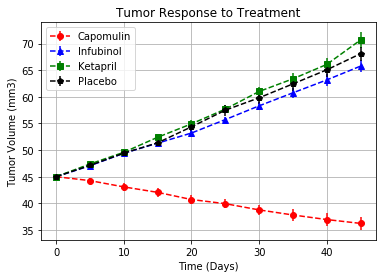

In [6]:
# Generate the Plot (with Error Bars)
plt.errorbar(Drug_List.index, Drug_List["Capomulin"], yerr=STD_ERR["Capomulin"], color="r", fmt="o--")
plt.errorbar(Drug_List.index, Drug_List["Infubinol"], yerr=STD_ERR["Infubinol"], color="b", fmt="^--")
plt.errorbar(Drug_List.index, Drug_List["Ketapril"], yerr=STD_ERR["Ketapril"], color="g", fmt="s--")
plt.errorbar(Drug_List.index, Drug_List["Placebo"], yerr=STD_ERR["Placebo"], color="black", fmt="p--")

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best")
plt.grid()
#Drug_List["Placebo"]
# Save the Figure



## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Mean_Met_Data = DF.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean().reset_index()
# Convert to DataFrame
Mean_Met_Data_DF = pd.DataFrame(Mean_Met_Data)
# Preview DataFrame
Mean_Met_Data_DF

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
STDERR_Met_Sites = DF.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem().reset_index()
# Convert to DataFrame
STDERR_Met_Sites_DF = pd.DataFrame(STDERR_Met_Sites)
# Preview DataFrame
STDERR_Met_Sites_DF

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [9]:
# Minor Data Munging to Re-Format the Data Frames
Mean_Met_Data_ReFormat = Mean_Met_Data.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
STDERR_Met_Sites_ReFormat = STDERR_Met_Sites_DF.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
Mean_Met_Data_ReFormat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


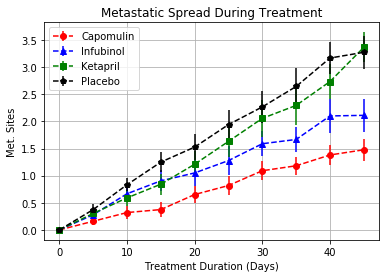

In [10]:
# Generate the Plot (with Error Bars)
plt.errorbar(Mean_Met_Data_ReFormat.index, Mean_Met_Data_ReFormat["Capomulin"], yerr=STDERR_Met_Sites_ReFormat["Capomulin"], color="r", fmt="o--")
plt.errorbar(Mean_Met_Data_ReFormat.index, Mean_Met_Data_ReFormat["Infubinol"], yerr=STDERR_Met_Sites_ReFormat["Infubinol"], color="b", fmt="^--")
plt.errorbar(Mean_Met_Data_ReFormat.index, Mean_Met_Data_ReFormat["Ketapril"], yerr=STDERR_Met_Sites_ReFormat["Ketapril"], color="g", fmt="s--")
plt.errorbar(Mean_Met_Data_ReFormat.index, Mean_Met_Data_ReFormat["Placebo"], yerr=STDERR_Met_Sites_ReFormat["Placebo"], color="black", fmt="p--")

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best")
plt.grid()


## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mice_Data = DF.groupby(["Drug","Timepoint"])["Mouse ID"].count().reset_index()
# Convert to DataFrame
Mice_Data_DF1 = pd.DataFrame(Mice_Data)
Mice_Data_DF = Mice_Data_DF1.rename(columns={"Mouse ID": "Mouse Count"})
# Preview DataFrame
Mice_Data_DF

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [12]:
# Minor Data Munging to Re-Format the Data Frames
Mice_Data_ReFormat = Mice_Data_DF.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
# Preview the Data Frame
Mice_Data_ReFormat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


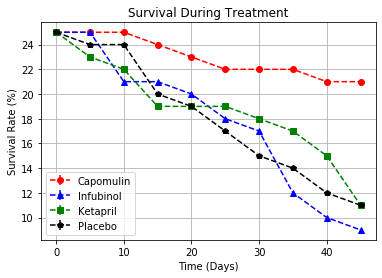

In [13]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(Mice_Data_ReFormat.index, Mice_Data_ReFormat["Capomulin"], yerr=0, color="r", fmt="o--")
plt.errorbar(Mice_Data_ReFormat.index, Mice_Data_ReFormat["Infubinol"], yerr=0, color="b", fmt="^--")
plt.errorbar(Mice_Data_ReFormat.index, Mice_Data_ReFormat["Ketapril"], yerr=0, color="g", fmt="s--")
plt.errorbar(Mice_Data_ReFormat.index, Mice_Data_ReFormat["Placebo"], yerr=0, color="black", fmt="p--")

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best")
plt.grid()

# Save the Figure

# Show the Figure


## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
Mean_VolDF.head(10)
# Display the data to confirm


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [15]:
Change_List = []
for x in Mean_VolDF.index:
    if Mean_VolDF.iloc[x,1] == 0:
        Change = (Mean_VolDF.iloc[x+9,2] / Mean_VolDF.iloc[x,2] - 1) * 100
        Change_List.append(Change)
Change_List

[-19.47530266789417,
 42.516491855897456,
 46.12347172785187,
 57.02879468660606,
 53.92334713476923,
 51.29796048315151,
 47.24117486320636,
 -22.32090046276667,
 52.085134287899024,
 46.57975086509525]

In [16]:
Drug_Names = []
y = 0
for x in Mean_VolDF["Drug"]:
    Drug_Names.append(x)
Drug_Names

['Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Capomulin',
 'Ceftamin',
 'Ceftamin',
 'Ceftamin',
 'Ceftamin',
 'Ceftamin',
 'Ceftamin',
 'Ceftamin',
 'Ceftamin',
 'Ceftamin',
 'Ceftamin',
 'Infubinol',
 'Infubinol',
 'Infubinol',
 'Infubinol',
 'Infubinol',
 'Infubinol',
 'Infubinol',
 'Infubinol',
 'Infubinol',
 'Infubinol',
 'Ketapril',
 'Ketapril',
 'Ketapril',
 'Ketapril',
 'Ketapril',
 'Ketapril',
 'Ketapril',
 'Ketapril',
 'Ketapril',
 'Ketapril',
 'Naftisol',
 'Naftisol',
 'Naftisol',
 'Naftisol',
 'Naftisol',
 'Naftisol',
 'Naftisol',
 'Naftisol',
 'Naftisol',
 'Naftisol',
 'Placebo',
 'Placebo',
 'Placebo',
 'Placebo',
 'Placebo',
 'Placebo',
 'Placebo',
 'Placebo',
 'Placebo',
 'Placebo',
 'Propriva',
 'Propriva',
 'Propriva',
 'Propriva',
 'Propriva',
 'Propriva',
 'Propriva',
 'Propriva',
 'Propriva',
 'Propriva',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 'Ramicane',
 '

In [17]:
Drug_Names_DF = pd.DataFrame(Drug_Names)
Drug_Names_DF2 = Drug_Names_DF.drop_duplicates()

Change_List_DF = pd.DataFrame(Change_List)
Change_List_DF

#Drug_Changes = pd.merge(Drug_Names_DF2, Change_List_DF)
#Drug_Changes


,0
0,-19.475303
1,42.516492
2,46.123472
3,57.028795
4,53.923347
5,51.297960
6,47.241175
7,-22.320900
8,52.085134
9,46.579751


In [40]:
# Store all Relevant Percent Changes into a Tuple
Changes = {
    "Capomulin":Change_List_DF.iloc[0,0],
    "Infubinol":Change_List_DF.iloc[2,0],
    "Ketapril":Change_List_DF.iloc[3,0],
    "Placebo":Change_List_DF.iloc[5,0]
}
Changes

{'Capomulin': -19.47530266789417,
 'Infubinol': 46.12347172785187,
 'Ketapril': 57.02879468660606,
 'Placebo': 51.29796048315151}

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

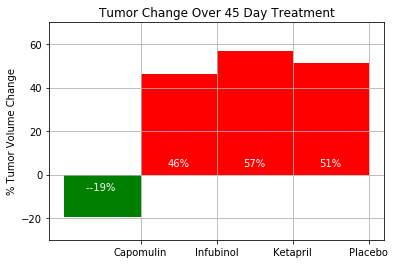